# Importações

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Inicio da Inteligência Artificial

In [21]:
url = 'https://raw.githubusercontent.com/MarcospsDonizete/Mat-inteligencia-Artificial/main/data/cars.csv'

df = pd.read_csv(url, delimiter=';', error_bad_lines=False)
df.head() 

,0,0.1,0.2,1,0.3,0.4,0.5,1.1,1.2,0.6,...,1.4,0.11,0.12,1.5,0.13,0.14,1.6,0.15,0.16,0.17
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0


In [22]:
df.shape

(1727, 25)

## Agrupamento (Clustering) usando K-means


In [23]:
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans

KMeans(init='random', n_clusters=3)

Treinando o modelo com os dados.

In [24]:
kmeans.fit(df)

KMeans(init='random', n_clusters=3)

Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features

In [25]:
kmeans.cluster_centers_

array([[ 2.50434783e-01,  2.50434783e-01,  2.50434783e-01,
         2.48695652e-01,  2.50434783e-01,  2.50434783e-01,
         2.50434783e-01,  2.48695652e-01,  2.48695652e-01,
         2.50434783e-01,  2.50434783e-01,  2.50434783e-01,
         3.32173913e-01,  3.33913043e-01,  3.33913043e-01,
         3.32173913e-01,  3.33913043e-01,  3.33913043e-01,
         1.00000000e+00, -8.32667268e-16, -8.32667268e-16,
         1.00000000e+00,  4.16333634e-16,  4.85722573e-17,
        -1.38777878e-17],
       [ 3.35907336e-01,  3.16602317e-01,  2.08494208e-01,
         1.38996139e-01,  3.16602317e-01,  3.16602317e-01,
         2.27799228e-01,  1.38996139e-01,  2.04633205e-01,
         2.54826255e-01,  2.70270270e-01,  2.70270270e-01,
        -2.22044605e-16,  5.09652510e-01,  4.90347490e-01,
         2.43243243e-01,  3.55212355e-01,  4.01544402e-01,
        -2.22044605e-16,  4.22779923e-01,  5.77220077e-01,
         1.66533454e-15,  7.41312741e-01,  1.33204633e-01,
         1.25482625e-01],
    

Observe que novos Centroids são calculados (inicialização randômica!)

In [26]:
kmeans.fit(df)

KMeans(init='random', n_clusters=3)

In [27]:
kmeans.cluster_centers_

array([[ 3.35907336e-01,  3.16602317e-01,  2.08494208e-01,
         1.38996139e-01,  3.16602317e-01,  3.16602317e-01,
         2.27799228e-01,  1.38996139e-01,  2.04633205e-01,
         2.54826255e-01,  2.70270270e-01,  2.70270270e-01,
        -2.22044605e-16,  5.09652510e-01,  4.90347490e-01,
         2.43243243e-01,  3.55212355e-01,  4.01544402e-01,
        -2.22044605e-16,  4.22779923e-01,  5.77220077e-01,
         1.77635684e-15,  7.41312741e-01,  1.33204633e-01,
         1.25482625e-01],
       [ 1.79810726e-01,  1.95583596e-01,  2.83911672e-01,
         3.40694006e-01,  1.95583596e-01,  1.95583596e-01,
         2.68138801e-01,  3.40694006e-01,  2.87066246e-01,
         2.46056782e-01,  2.33438486e-01,  2.33438486e-01,
         1.66533454e-16,  4.92113565e-01,  5.07886435e-01,
         4.06940063e-01,  3.15457413e-01,  2.77602524e-01,
         6.05678233e-01,  2.60252366e-01,  1.34069401e-01,
         1.00000000e+00,  4.99600361e-16, -4.16333634e-17,
         7.63278329e-17],
    

Executa K-Means para agrupar os dados e retorna Tabela de Distâncias (fit_transform).

Calcula a distância entre os dados de cada linha (instância) e cada um dos 3 clusters.


In [28]:
distance = kmeans.fit_transform(df)
distance

array([[2.72853075, 2.19254136, 1.89534421],
       [2.67132921, 2.24935625, 1.89534421],
       [2.84015874, 2.07348768, 1.89534421],
       ...,
       [2.47241456, 2.01953732, 2.36260341],
       [2.23626131, 2.60180374, 2.75289241],
       [2.16966088, 2.64985823, 2.75289241]])

Diposição de cada item em cada Cluster

In [29]:
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 1, 0, 0])

## Cálculo do WCSSE - Within Cluster Sum of Squared Errors

In [30]:
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(df)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 8129.791546033597
2 7253.8713956778465
3 6752.173914801604
4 6442.196695537986
5 6171.478314068213
6 6001.837992837901
7 5890.668658926308
8 5630.3210145874855
9 5523.1998592703385
10 5507.150859101248


## Método de Elbow

Ao final do Estudo do Metodo de Elbow a seguir, foram gerados 11 clusters.

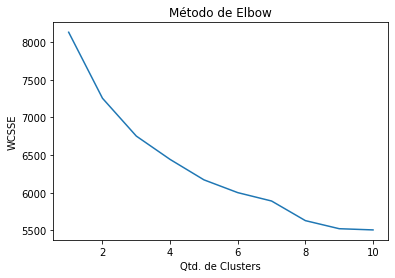

In [31]:
plt.plot(range(1, maxclusters), wcsse)
plt.title('Método de Elbow')
plt.xlabel('Qtd. de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

In [32]:
newcustomer1= [ [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ]
kmeans.predict(newcustomer1)

c:\users\sergi\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [33]:
newcustomer2 = [ [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0] ]
kmeans.predict(newcustomer2)

c:\users\sergi\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([6])